In [11]:
import pandas as pd
import numpy as np
import html
import re
import nltk
import time

In [3]:
raw_dict=pd.read_pickle('all_lyrics.pickle')

In [19]:
#new version of the data scraping
raw_dict=pd.read_pickle('all_lyrics.pickle')
df=pd.DataFrame.from_dict(raw_dict, orient='index')
df.index.name='Songs'
df.reset_index(inplace=True)
df.columns=['Song','Lyrics','Artist']
print (df.head(5))
df.info()

                               Song  \
0                  Under Your Spell   
1                     It's All Good   
2                When We Were Young   
3                      Safe & Sound   
4  Don't Let Me Be The Last To Know   

                                              Lyrics       Artist  
0    Something about you that I can't shake    Do...        dylan  
1    Talk about me babe, if you must.   Throw out...        dylan  
2    Everybody loves the things you do  From the ...        adele  
3    I remember tears streaming down your face  W...  taylorswift  
4    My friends say you're so into me   And that ...       spears  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1645 entries, 0 to 1644
Data columns (total 3 columns):
Song      1645 non-null object
Lyrics    1645 non-null object
Artist    1645 non-null object
dtypes: object(3)
memory usage: 38.6+ KB


In [33]:
# new_dict = {}
# for artist in raw_dict:
#     new_dict[artist]=  {}
#     for song in raw_dict[artist]:
# #         import pdb; pdb.set_trace()
#         new_values = (list(raw_dict[artist][song].keys())[0], 
#                       list(raw_dict[artist][song].values())[0])
#         new_dict[artist][song] = new_values

In [34]:
# df = pd.DataFrame(new_dict)


In [85]:
# df = pd.DataFrame([(k,k1,v1) for k,v in new_dict.items()
#                    for k1,v1 in v.items()], columns = ['Artist','Song','Lyrics'])

In [86]:
# df[['Lyrics', 'Length']] = df['Lyrics'].apply(pd.Series)

In [9]:
df.loc[df.Songs=='4th Time Around','Lyrics']


690      When she said   "Don't waste your words, the...
Name: Lyrics, dtype: object

In [20]:

df.Lyrics=df.Lyrics.apply(html.unescape) #remove the &quot

In [21]:
#remove the [] and () with inserted content
df.Lyrics=df.Lyrics.apply((lambda x : re.sub("[\(\[].*?[\)\]]", "", x)))

In [17]:
df.columns

Index(['Songs', 'Lyrics', 'Artists'], dtype='object')

In [23]:
bb_df=pd.read_csv('billboard_lyrics_1964-2015.csv',encoding="latin1")

In [81]:
bb_df.head(5)

,Rank,Song,Artist,Year,Lyrics,Source
0,1,wooly bully,sam the sham and the pharaohs,1965,sam the sham miscellaneous wooly bully wooly b...,3.0
1,2,i cant help myself sugar pie honey bunch,four tops,1965,sugar pie honey bunch you know that i love yo...,1.0
2,3,i cant get no satisfaction,the rolling stones,1965,,1.0
3,4,you were on my mind,we five,1965,when i woke up this morning you were on my mi...,1.0
4,5,youve lost that lovin feelin,the righteous brothers,1965,you never close your eyes anymore when i kiss...,1.0


In [82]:
bb_df.columns

Index(['Rank', 'Song', 'Artist', 'Year', 'Lyrics', 'Source'], dtype='object')

In [28]:
sub_bb_df=bb_df[[ 'Song', 'Artist', 'Lyrics']]

In [25]:
df

,Song,Lyrics,Artist
0,Under Your Spell,Something about you that I can't shake Do...,dylan
1,It's All Good,"Talk about me babe, if you must. Throw out...",dylan
2,When We Were Young,Everybody loves the things you do From the ...,adele
3,Safe & Sound,I remember tears streaming down your face W...,taylorswift
4,Don't Let Me Be The Last To Know,My friends say you're so into me And that ...,spears
5,All About You,"I know girl, when you look at me You do...",brunomars
6,Me Against The Music,All my people in the crowd Grab a partner t...,spears
7,Human Nature,Looking Out Across The Night-Time The ...,jackson
8,Beyond Here Lies Nothin',"Oh well, I love you pretty baby You're the...",dylan
9,"It's All Over Now, Baby Blue","You must leave now, take what you need, you ...",dylan


In [52]:
co_df=df.append(sub_bb_df)
co_df.describe()

,Artist,Lyrics,Song
count,6745,6558,6745
unique,2480,6252,6226
top,dylan,,angel
freq,438,45,6


In [54]:
co_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6745 entries, 0 to 5099
Data columns (total 3 columns):
Artist    6745 non-null object
Lyrics    6558 non-null object
Song      6745 non-null object
dtypes: object(3)
memory usage: 210.8+ KB


## word cloud analysis by artist

In [79]:
%matplotlib inline

import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import wordcloud 


In [139]:
stopwords=set(wordcloud.STOPWORDS)
stopwords.add('know');stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 'know',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'ought',
 'our',
 'ours',
 'ourselves',
 'out',
 'over

In [107]:
wc = wordcloud.WordCloud(background_color="white", max_words=500,# mask=alice_mask,
               stopwords=stopwords)

In [55]:
Artist_gr=df.groupby(['Artist'])

In [56]:
print(Artist_gr.ngroups)

9


In [64]:
#merge the strings

#define a function to merge
grouped_lyrics=Artist_gr['Lyrics'].apply(lambda x: "{%s}" % ', '.join(x))

In [112]:
grouped_lyrics

Artist
adele           {  Everybody loves the things you do  From the...
brunomars       {      I know girl, when you look at me  You d...
dylan           {  Something about you that I can't shake    D...
jackson         {      Looking Out  Across The Night-Time  The...
ladygaga        {  Hold me daddy, real tight.  They'll take ou...
ozzyosbourne    {  Thoughts about you just wonât let me slee...
spears          {  My friends say you're so into me   And that...
taylorswift     {  I remember tears streaming down your face  ...
usher           {  Just tell me where to go and I'll take off ...
Name: Lyrics, dtype: object

In [106]:
type(grouped_lyrics['adele'])

str

In [135]:
grouped_lyrics['brunomars']

'{      I know girl, when you look at me  You don\'t know how I feel  Cause I\'m usually so nonchalant  My feelings I conceal  But I want you to know  Oh, I want you to know    I must admit I\'ve felt this way for more than quite a while  But I can\'t hold it no longer when I see that pretty smile  Can\'t wait no more  Oh, I can\'t wait no more    Oooh        Girl, to tell you the truth  It\'s always been you  I\'m all about you  Oh, girl  No one can do me the way you do  It\'s always been you  I\'m all about you        Maybe I\'m a fool for speaking up but I don\'t mind  Cause a girl like you will come around like  Once in a million times  So what do I do?  Tell me what do I do    And the look that you are givin\' me gives me hope to believe  So for you baby I\'ll change my ways I\'ll  Wear my heart on my sleeve  Got nothin\' to lose  I\'ve got nothin\' to lose        Oh, girl, to tell you the truth  It\'s always been you  I\'m all about you  Oh, girl  No one can do me the way you do 

In [140]:
def wc_generate(x):
    wc = wordcloud.WordCloud(background_color="white", max_words=500,# mask=alice_mask,
               stopwords=stopwords)
    wc.generate(x)
    return wc

In [141]:
grouped_wc=grouped_lyrics.apply(lambda x: wc_generate(x));grouped_wc

Artist
adele           <wordcloud.wordcloud.WordCloud object at 0x11c...
brunomars       <wordcloud.wordcloud.WordCloud object at 0x11c...
dylan           <wordcloud.wordcloud.WordCloud object at 0x11c...
jackson         <wordcloud.wordcloud.WordCloud object at 0x116...
ladygaga        <wordcloud.wordcloud.WordCloud object at 0x118...
ozzyosbourne    <wordcloud.wordcloud.WordCloud object at 0x116...
spears          <wordcloud.wordcloud.WordCloud object at 0x11b...
taylorswift     <wordcloud.wordcloud.WordCloud object at 0x118...
usher           <wordcloud.wordcloud.WordCloud object at 0x118...
Name: Lyrics, dtype: object

In [142]:
def plot_wc(x):
    plt.imshow(x, interpolation="bilinear")
    plt.axis("off")
    plt.figure()

Artist
adele           None
brunomars       None
dylan           None
jackson         None
ladygaga        None
ozzyosbourne    None
spears          None
taylorswift     None
usher           None
Name: Lyrics, dtype: object

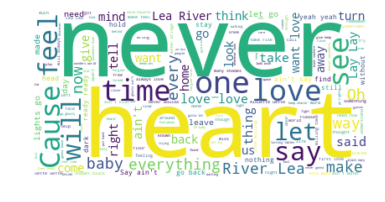

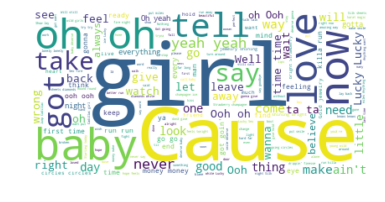

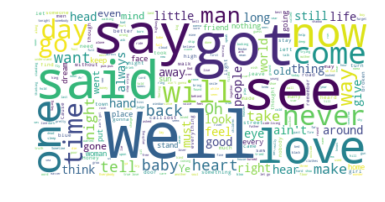

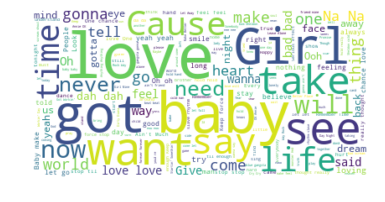

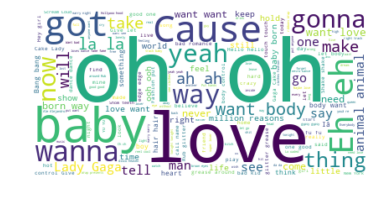

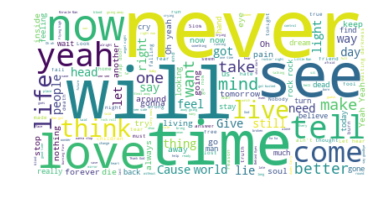

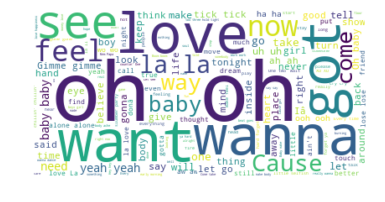

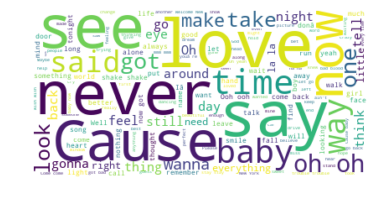

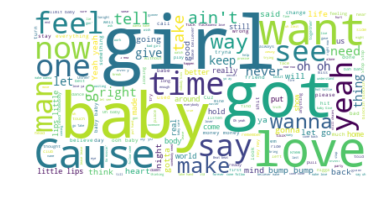

In [143]:
grouped_wc.apply(lambda x: plot_wc(x))

In [108]:
wc.generate(grouped_lyrics['adele'])

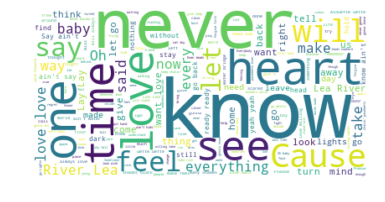

In [109]:
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.figure()

## Build one pipeline to analyze the sentiment

In [95]:
import os
import sys
import pickle
import re
import string

In [102]:
import luigi

In [103]:
from nltk.tokenize import word_tokenize
from nltk import FreqDist
from nltk.sentiment.vader import SentimentIntensityAnalyzer


/Users/feiwang/anaconda3/envs/py36er/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
import matplotlib as mpl
%matplotlib inline 

In [ ]:
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

import matplotlib.pyplot as plt

In [104]:
import pandas as pd
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

/Users/feiwang/anaconda3/envs/py36er/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [15]:
len(time.strftime("%x"))

8

In [98]:
current Data

'..'